In [1]:
 import numpy as np
import pandas as pd

In [2]:
train = pd.read_csv('train.csv')

In [3]:
train.shape

(1092059, 4)

In [4]:
train=train.sample(frac=0.1)

In [5]:
train.shape

(109206, 4)

In [6]:
data = pd.read_csv("jokes.csv")

In [7]:
data.shape

(139, 2)

In [8]:
df = pd.merge(train,data,on='joke_id')
df.head()

,id,user_id,joke_id,Rating,joke_text
0,1139_125,1139,125,1.312,A guy walked past a mental hospital and heard ...
1,17332_125,17332,125,1.875,A guy walked past a mental hospital and heard ...
2,25576_125,25576,125,-5.406,A guy walked past a mental hospital and heard ...
3,37740_125,37740,125,2.188,A guy walked past a mental hospital and heard ...
4,14386_125,14386,125,6.844,A guy walked past a mental hospital and heard ...


In [9]:
test = pd.read_csv("test.csv")

In [10]:
test.shape

(537880, 3)

In [11]:
combi = df.append(test, ignore_index=True)
combi.shape

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:6201: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  sort=sort)


(647086, 5)

In [12]:
combi.head()

,Rating,id,joke_id,joke_text,user_id
0,1.312,1139_125,125,A guy walked past a mental hospital and heard ...,1139
1,1.875,17332_125,125,A guy walked past a mental hospital and heard ...,17332
2,-5.406,25576_125,125,A guy walked past a mental hospital and heard ...,25576
3,2.188,37740_125,125,A guy walked past a mental hospital and heard ...,37740
4,6.844,14386_125,125,A guy walked past a mental hospital and heard ...,14386


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [14]:
combi.groupby('joke_text')['Rating'].mean().sort_values(ascending=False).head()

joke_text
Hillary, Bill Clinton and the Pope are sitting together on an airplane. Bill says, "I could throw one thousand-dollar bill out of this plane and make one person very happy." Hillary says, "I could throw 10 hundred-dollar bills out of the plane and make 10 people very happy." The Pope chips in and says, "I could throw Bill out of the airplane and make the whole country happy."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    

In [15]:
combi.groupby('joke_text')['Rating'].count().sort_values(ascending=False).head()

joke_text
How many men does it take to screw in a light bulb? One. Men will screw anything.                      2859
How many feminists does it take to screw in a light bulb? That's not funny.                            2836
Q: What did the blind person say when given some matzah? A: Who the hell wrote this?                   2803
Q. Did you hear about the dyslexic devil worshiper? A. He sold his soul to Santa.                      2797
They asked the Japanese visitor if they have elections in his country. "Every morning," he answers.    2776
Name: Rating, dtype: int64

In [16]:
ratings = pd.DataFrame(combi.groupby('joke_text')['Rating'].mean())
ratings.head()

,Rating
joke_text,
"(A) The Japanese eat very little fat and suffer fewer heart attacks than the British or Americans. (B) On the other hand, the French eat a lot of fat and also suffer fewer heart attacks than the British or Americans. (C) The Chinese drink very little red wine and suffer fewer heart attacks than the British or Americans. (D) The Italians drink excessive amounts of red wine and also suffer fewer heart attacks than the British or Americans. (E) Conclusion: Eat and drink what you like. It's speaking English that kills you.",2.563397
"A Briton, a Frenchman and a Russian are viewing a painting of Adam and Eve frolicking in the Garden of Eden. ""Look at their reserve, their calm,"" muses the Brit. ""They must be British."" ""Nonsense,"" the Frenchman disagrees. ""They're naked, and so beautiful. Clearly, they are French."" ""No way! They have no clothes and no shelter,"" the Russian points out, ""They have only an apple to eat, and they are being told they live in a paradise. Obviously, they are Russian.""",3.370223
"A Czechoslovakian man felt his eyesight was growing steadily worse, and felt it was time to go see an optometrist. The doctor started with some simple testing, and showed him a standard eye chart with letters of diminishing size: CRKBNWXSKZY... ""Can you read this?"" the doctor asked. ""Read it?"" the Czech answered. ""Doc, I know him!""",2.153866
"A Jewish young man was seeing a psychiatrist for an eating and sleeping disorder. ""I am so obsessed with my mother...As soon as I go to sleep, I start dreaming, and everyone in my dream turns into my mother. I wake up in such a state, and all I can do is go downstairs and eat a piece of toast."" The psychiatrist replies, ""What, just one piece of toast, for a big boy like you?""",-0.129281
"A Panda walks into a bar, sits down at a table and orders a beer and a double cheeseburger. After he is finished eating, he pulls out a gun and rips the place with gunfire. Patrons scatter and dive under chairs and tables as the bear runs out the door. After ensuring that no one is hurt, the bartender races out the door, and calls after the bear: ""What the hell did you do that for?"" The bear calls back, ""I'm a Panda. Look it up in the dictionary."" The bartender returns, pulls out his dictionary. panda: \Pan""da\, n. (Zo[""o]l.) A small Asiatic mammal (Ailurus fulgens) having fine soft fur. It is related to the bears, and inhabits the mountains of Northern India. Eats shoots and leaves.",1.802013


In [17]:
ratings['num of ratings'] = pd.DataFrame(combi.groupby('joke_text')['Rating'].count())
ratings.head()

,Rating,num of ratings
joke_text,,
"(A) The Japanese eat very little fat and suffer fewer heart attacks than the British or Americans. (B) On the other hand, the French eat a lot of fat and also suffer fewer heart attacks than the British or Americans. (C) The Chinese drink very little red wine and suffer fewer heart attacks than the British or Americans. (D) The Italians drink excessive amounts of red wine and also suffer fewer heart attacks than the British or Americans. (E) Conclusion: Eat and drink what you like. It's speaking English that kills you.",2.563397,761
"A Briton, a Frenchman and a Russian are viewing a painting of Adam and Eve frolicking in the Garden of Eden. ""Look at their reserve, their calm,"" muses the Brit. ""They must be British."" ""Nonsense,"" the Frenchman disagrees. ""They're naked, and so beautiful. Clearly, they are French."" ""No way! They have no clothes and no shelter,"" the Russian points out, ""They have only an apple to eat, and they are being told they live in a paradise. Obviously, they are Russian.""",3.370223,1110
"A Czechoslovakian man felt his eyesight was growing steadily worse, and felt it was time to go see an optometrist. The doctor started with some simple testing, and showed him a standard eye chart with letters of diminishing size: CRKBNWXSKZY... ""Can you read this?"" the doctor asked. ""Read it?"" the Czech answered. ""Doc, I know him!""",2.153866,589
"A Jewish young man was seeing a psychiatrist for an eating and sleeping disorder. ""I am so obsessed with my mother...As soon as I go to sleep, I start dreaming, and everyone in my dream turns into my mother. I wake up in such a state, and all I can do is go downstairs and eat a piece of toast."" The psychiatrist replies, ""What, just one piece of toast, for a big boy like you?""",-0.129281,417
"A Panda walks into a bar, sits down at a table and orders a beer and a double cheeseburger. After he is finished eating, he pulls out a gun and rips the place with gunfire. Patrons scatter and dive under chairs and tables as the bear runs out the door. After ensuring that no one is hurt, the bartender races out the door, and calls after the bear: ""What the hell did you do that for?"" The bear calls back, ""I'm a Panda. Look it up in the dictionary."" The bartender returns, pulls out his dictionary. panda: \Pan""da\, n. (Zo[""o]l.) A small Asiatic mammal (Ailurus fulgens) having fine soft fur. It is related to the bears, and inhabits the mountains of Northern India. Eats shoots and leaves.",1.802013,711


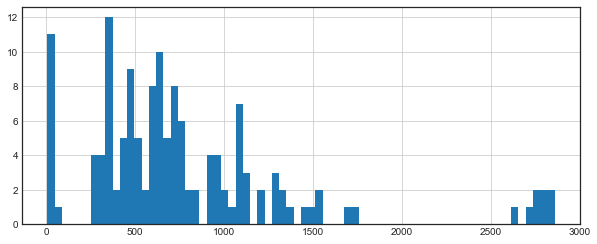

In [18]:
plt.figure(figsize=(10,4))
ratings['num of ratings'].hist(bins=70)

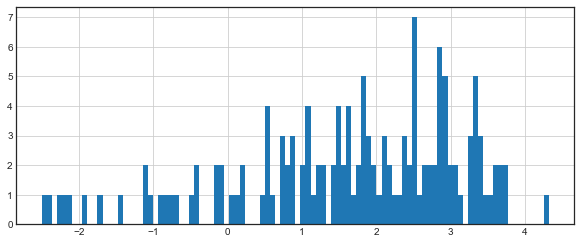

In [19]:
plt.figure(figsize=(10,4))
ratings['Rating'].hist(bins=100)

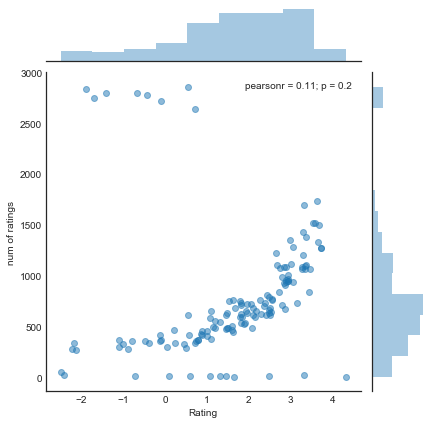

In [20]:
sns.jointplot(x='Rating',y='num of ratings',data=ratings,alpha=0.5)

In [21]:
jokemat = df.pivot_table(index='user_id',columns='joke_text',values='Rating')
jokemat.head()

joke_text,"(A) The Japanese eat very little fat and suffer fewer heart attacks than the British or Americans. (B) On the other hand, the French eat a lot of fat and also suffer fewer heart attacks than the British or Americans. (C) The Chinese drink very little red wine and suffer fewer heart attacks than the British or Americans. (D) The Italians drink excessive amounts of red wine and also suffer fewer heart attacks than the British or Americans. (E) Conclusion: Eat and drink what you like. It's speaking English that kills you.","A Briton, a Frenchman and a Russian are viewing a painting of Adam and Eve frolicking in the Garden of Eden. ""Look at their reserve, their calm,"" muses the Brit. ""They must be British."" ""Nonsense,"" the Frenchman disagrees. ""They're naked, and so beautiful. Clearly, they are French."" ""No way! They have no clothes and no shelter,"" the Russian points out, ""They have only an apple to eat, and they are being told they live in a paradise. Obviously, they are Russian.""","A Czechoslovakian man felt his eyesight was growing steadily worse, and felt it was time to go see an optometrist. The doctor started with some simple testing, and showed him a standard eye chart with letters of diminishing size: CRKBNWXSKZY... ""Can you read this?"" the doctor asked. ""Read it?"" the Czech answered. ""Doc, I know him!""","A Jewish young man was seeing a psychiatrist for an eating and sleeping disorder. ""I am so obsessed with my mother...As soon as I go to sleep, I start dreaming, and everyone in my dream turns into my mother. I wake up in such a state, and all I can do is go downstairs and eat a piece of toast."" The psychiatrist replies, ""What, just one piece of toast, for a big boy like you?""","A Panda walks into a bar, sits down at a table and orders a beer and a double cheeseburger. After he is finished eating, he pulls out a gun and rips the place with gunfire. Patrons scatter and dive under chairs and tables as the bear runs out the door. After ensuring that no one is hurt, the bartender races out the door, and calls after the bear: ""What the hell did you do that for?"" The bear calls back, ""I'm a Panda. Look it up in the dictionary."" The bartender returns, pulls out his dictionary. panda: \Pan""da\, n. (Zo[""o]l.) A small Asiatic mammal (Ailurus fulgens) having fine soft fur. It is related to the bears, and inhabits the mountains of Northern India. Eats shoots and leaves.","A blonde, brunette, and a red head are all lined up to be shot to death by a firing squad. The brunette shouts, ""Tornado!"" and the riflemen turn around to see the tornado. It isn't there, and the brunette uses that time to escape. The red head yells, ""Lightning!"" and the riflemen again turn to see the disaster, yet there is no disaster and the red head escapes. The blonde yells, ""Fire!"" The riflemen do.","A boy comes home from school and tells his mother that he got a part in the school play. ""What part?"" the mother asks. ""I play a Jewish husband,"" the boy replies. ""Go back to school and tell your teacher that you want a speaking role!""",A bus station is where a bus stops. A train station is where a train stops. On my desk I have a work station...,"A couple has been married for 75 years. For the husband's 95th birthday, his wife decides to surprise him by hiring a prostitute. That day, the doorbell rings. The husband uses his walker to get to the door and opens it. A 21-year-old in a latex outfit smiles and says, ""Hi, I here to give you super sex!"" The old man says, ""I'll take the soup.""","A couple of hunters are out in the woods in the deep south when one of them falls to the ground. He doesn't seem to be breathing, and his eyes are rolled back in his head. The other guy whips out his cell phone and calls 911. He gasps to the operator, ""My friend is dead! What can I do?"" The operator, in a calm and soothing voice, says, ""Alright, take it easy. I can help. First, let's make sure he's dead."" There is silence,

In [23]:
ratings.sort_values('num of ratings',ascending=False).head(10)

,Rating,num of ratings
joke_text,,
How many men does it take to screw in a light bulb? One. Men will screw anything.,0.541743,2859
How many feminists does it take to screw in a light bulb? That's not funny.,-1.906459,2836
Q: What did the blind person say when given some matzah? A: Who the hell wrote this?,-1.415220,2803
Q. Did you hear about the dyslexic devil worshiper? A. He sold his soul to Santa.,-0.687031,2797
"They asked the Japanese visitor if they have elections in his country. ""Every morning,"" he answers.",-0.428122,2776
Q. What is orange and sounds like a parrot? A. A carrot.,-1.695804,2747
"A dog walks into Western Union and asks the clerk to send a telegram. He fills out a form on which he writes down the telegram he wishes to send: ""Bow wow wow, bow wow wow."" The clerk says, ""You can add another 'Bow wow' for the same price."" The dog responded, ""Now wouldn't that sound a little silly?""",-0.098657,2721
"Q: If a person who speaks three languages is called ""trilingual,"" and a person who speaks two languages is called ""bilingual,"" what do you call a person who only speaks one language? A: American!",0.720132,2643
"A radio conversation between a US naval ship and Canadian authorities... Americans: Please divert your course 15 degrees to the North to avoid a collision. Canadians: Recommend you divert YOUR course 15 degrees to the South to avoid a collision. Americans: This is the captain of a US Navy ship. I say again, divert YOUR course. Canadians: No. I say again, you divert YOUR course. Americans: This is the aircraft carrier USS Lincoln, the second largest ship in the United States' Atlantic Fleet. We are accompanied by three destroyers, three cruisers and numerous support vessels. I demand that you change your course 15 degrees North, that's ONE FIVE DEGREES NORTH, or counter-measures will be undertaken to ensure the safety of this ship. Canadians: This is a lighthouse. Your call.",3.627283,1732


In [24]:
ratings.head()

,Rating,num of ratings
joke_text,,
"(A) The Japanese eat very little fat and suffer fewer heart attacks than the British or Americans. (B) On the other hand, the French eat a lot of fat and also suffer fewer heart attacks than the British or Americans. (C) The Chinese drink very little red wine and suffer fewer heart attacks than the British or Americans. (D) The Italians drink excessive amounts of red wine and also suffer fewer heart attacks than the British or Americans. (E) Conclusion: Eat and drink what you like. It's speaking English that kills you.",2.563397,761
"A Briton, a Frenchman and a Russian are viewing a painting of Adam and Eve frolicking in the Garden of Eden. ""Look at their reserve, their calm,"" muses the Brit. ""They must be British."" ""Nonsense,"" the Frenchman disagrees. ""They're naked, and so beautiful. Clearly, they are French."" ""No way! They have no clothes and no shelter,"" the Russian points out, ""They have only an apple to eat, and they are being told they live in a paradise. Obviously, they are Russian.""",3.370223,1110
"A Czechoslovakian man felt his eyesight was growing steadily worse, and felt it was time to go see an optometrist. The doctor started with some simple testing, and showed him a standard eye chart with letters of diminishing size: CRKBNWXSKZY... ""Can you read this?"" the doctor asked. ""Read it?"" the Czech answered. ""Doc, I know him!""",2.153866,589
"A Jewish young man was seeing a psychiatrist for an eating and sleeping disorder. ""I am so obsessed with my mother...As soon as I go to sleep, I start dreaming, and everyone in my dream turns into my mother. I wake up in such a state, and all I can do is go downstairs and eat a piece of toast."" The psychiatrist replies, ""What, just one piece of toast, for a big boy like you?""",-0.129281,417
"A Panda walks into a bar, sits down at a table and orders a beer and a double cheeseburger. After he is finished eating, he pulls out a gun and rips the place with gunfire. Patrons scatter and dive under chairs and tables as the bear runs out the door. After ensuring that no one is hurt, the bartender races out the door, and calls after the bear: ""What the hell did you do that for?"" The bear calls back, ""I'm a Panda. Look it up in the dictionary."" The bartender returns, pulls out his dictionary. panda: \Pan""da\, n. (Zo[""o]l.) A small Asiatic mammal (Ailurus fulgens) having fine soft fur. It is related to the bears, and inhabits the mountains of Northern India. Eats shoots and leaves.",1.802013,711


In [28]:
user_ratings = jokemat['How many men does it take to screw in a light bulb? One. Men will screw anything.']
user_ratings.head(10)

user_id
1       NaN
2       NaN
3       NaN
4       NaN
5       NaN
6       NaN
7       NaN
8     9.031
9       NaN
10      NaN
Name: How many men does it take to screw in a light bulb? One. Men will screw anything., dtype: float64

In [29]:
similar = jokemat.corrwith(user_ratings)

In [30]:
corr_joke = pd.DataFrame(similar,columns=['Correlation'])
corr_joke.dropna(inplace=True)
corr_joke.head()

,Correlation
joke_text,
"(A) The Japanese eat very little fat and suffer fewer heart attacks than the British or Americans. (B) On the other hand, the French eat a lot of fat and also suffer fewer heart attacks than the British or Americans. (C) The Chinese drink very little red wine and suffer fewer heart attacks than the British or Americans. (D) The Italians drink excessive amounts of red wine and also suffer fewer heart attacks than the British or Americans. (E) Conclusion: Eat and drink what you like. It's speaking English that kills you.",0.105635
"A Briton, a Frenchman and a Russian are viewing a painting of Adam and Eve frolicking in the Garden of Eden. ""Look at their reserve, their calm,"" muses the Brit. ""They must be British."" ""Nonsense,"" the Frenchman disagrees. ""They're naked, and so beautiful. Clearly, they are French."" ""No way! They have no clothes and no shelter,"" the Russian points out, ""They have only an apple to eat, and they are being told they live in a paradise. Obviously, they are Russian.""",0.279272
"A Czechoslovakian man felt his eyesight was growing steadily worse, and felt it was time to go see an optometrist. The doctor started with some simple testing, and showed him a standard eye chart with letters of diminishing size: CRKBNWXSKZY... ""Can you read this?"" the doctor asked. ""Read it?"" the Czech answered. ""Doc, I know him!""",0.206407
"A Jewish young man was seeing a psychiatrist for an eating and sleeping disorder. ""I am so obsessed with my mother...As soon as I go to sleep, I start dreaming, and everyone in my dream turns into my mother. I wake up in such a state, and all I can do is go downstairs and eat a piece of toast."" The psychiatrist replies, ""What, just one piece of toast, for a big boy like you?""",-0.178807
"A Panda walks into a bar, sits down at a table and orders a beer and a double cheeseburger. After he is finished eating, he pulls out a gun and rips the place with gunfire. Patrons scatter and dive under chairs and tables as the bear runs out the door. After ensuring that no one is hurt, the bartender races out the door, and calls after the bear: ""What the hell did you do that for?"" The bear calls back, ""I'm a Panda. Look it up in the dictionary."" The bartender returns, pulls out his dictionary. panda: \Pan""da\, n. (Zo[""o]l.) A small Asiatic mammal (Ailurus fulgens) having fine soft fur. It is related to the bears, and inhabits the mountains of Northern India. Eats shoots and leaves.",0.244826


In [31]:
corr_joke.sort_values('Correlation',ascending=False).head(10)

,Correlation
joke_text,
How many men does it take to screw in a light bulb? One. Men will screw anything.,1.000000
What's the difference between a Macintosh and an Etch-a-Sketch? You don't have to shake the Mac to clear the screen.,1.000000
"Q. What's O. J. Simpson's web address? A. Slash, slash, backslash, slash, slash, escape.",0.870792
"Person 1: Hey, wanna hear a great knock-knock joke? Person 2: Sure, What is it? Person 1: Okay, you start. Person 2: Knock-knock. Person 1: Who's there? Person 2: ... Person 1: Hah!",0.733239
Q: How many presidents does it take to screw in a light bulb? A: It depends upon your definition of screwing a light bulb.,0.683429
"A lady bought a new Lexus. It cost a bundle. Two days later, she brought it back, complaining that the radio was not working. ""Madam,"" said the sales manager, ""the audio system in this car is completely automatic. All you need to do is tell it what you want to listen to, and you will hear exactly that!"" She drove out, somewhat amazed and a little confused. She looked at the radio and said, ""Nelson."" The radio responded, ""Ricky or Willie?"" She was astounded. If she wanted Beethoven, that's what she got. If she wanted Nat King Cole, she got it. She was stopped at a traffic light enjoying ""On the Road Again"" when the light turned green and she pulled out. Suddenly an enormous sports utility vehicle coming from the street she was crossing sped toward her, obviously not paying attention to the light. She swerved and narrowly missed a collision. ""Idiot!"" she yelled and, from the radio, ""Ladies and gentlemen, the President of the United States.""",0.622418
What do you get when you run over a parakeet with a lawnmower? Shredded tweet.,0.579496
"A couple has been married for 75 years. For the husband's 95th birthday, his wife decides to surprise him by hiring a prostitute. That day, the doorbell rings. The husband uses his walker to get to the door and opens it. A 21-year-old in a latex outfit smiles and says, ""Hi, I here to give you super sex!"" The old man says, ""I'll take the soup.""",0.558913
America: 8:00 - Welcome to work! 12:00 - Lunch break 17:00 - The work day is over Japan: 8:00 - Are you already at work? 12:00 - Continue your work 17:00 - The work day is over 20:00 - Please finish your work Romania: 8:00 - Has anyone come to work? 12:00 - Did someone start working? 16:00 - Is anyone at work?,0.514269


In [32]:
corr_joke = corr_joke.join(ratings['num of ratings'])
corr_joke.head()

,Correlation,num of ratings
joke_text,,
"(A) The Japanese eat very little fat and suffer fewer heart attacks than the British or Americans. (B) On the other hand, the French eat a lot of fat and also suffer fewer heart attacks than the British or Americans. (C) The Chinese drink very little red wine and suffer fewer heart attacks than the British or Americans. (D) The Italians drink excessive amounts of red wine and also suffer fewer heart attacks than the British or Americans. (E) Conclusion: Eat and drink what you like. It's speaking English that kills you.",0.105635,761
"A Briton, a Frenchman and a Russian are viewing a painting of Adam and Eve frolicking in the Garden of Eden. ""Look at their reserve, their calm,"" muses the Brit. ""They must be British."" ""Nonsense,"" the Frenchman disagrees. ""They're naked, and so beautiful. Clearly, they are French."" ""No way! They have no clothes and no shelter,"" the Russian points out, ""They have only an apple to eat, and they are being told they live in a paradise. Obviously, they are Russian.""",0.279272,1110
"A Czechoslovakian man felt his eyesight was growing steadily worse, and felt it was time to go see an optometrist. The doctor started with some simple testing, and showed him a standard eye chart with letters of diminishing size: CRKBNWXSKZY... ""Can you read this?"" the doctor asked. ""Read it?"" the Czech answered. ""Doc, I know him!""",0.206407,589
"A Jewish young man was seeing a psychiatrist for an eating and sleeping disorder. ""I am so obsessed with my mother...As soon as I go to sleep, I start dreaming, and everyone in my dream turns into my mother. I wake up in such a state, and all I can do is go downstairs and eat a piece of toast."" The psychiatrist replies, ""What, just one piece of toast, for a big boy like you?""",-0.178807,417
"A Panda walks into a bar, sits down at a table and orders a beer and a double cheeseburger. After he is finished eating, he pulls out a gun and rips the place with gunfire. Patrons scatter and dive under chairs and tables as the bear runs out the door. After ensuring that no one is hurt, the bartender races out the door, and calls after the bear: ""What the hell did you do that for?"" The bear calls back, ""I'm a Panda. Look it up in the dictionary."" The bartender returns, pulls out his dictionary. panda: \Pan""da\, n. (Zo[""o]l.) A small Asiatic mammal (Ailurus fulgens) having fine soft fur. It is related to the bears, and inhabits the mountains of Northern India. Eats shoots and leaves.",0.244826,711


In [33]:
corr_joke[corr_joke['num of ratings']>100].sort_values('Correlation',ascending=False).head()

,Correlation,num of ratings
joke_text,,
How many men does it take to screw in a light bulb? One. Men will screw anything.,1.000000,2859
"Person 1: Hey, wanna hear a great knock-knock joke? Person 2: Sure, What is it? Person 1: Okay, you start. Person 2: Knock-knock. Person 1: Who's there? Person 2: ... Person 1: Hah!",0.733239,274
Q: How many presidents does it take to screw in a light bulb? A: It depends upon your definition of screwing a light bulb.,0.683429,336
"A lady bought a new Lexus. It cost a bundle. Two days later, she brought it back, complaining that the radio was not working. ""Madam,"" said the sales manager, ""the audio system in this car is completely automatic. All you need to do is tell it what you want to listen to, and you will hear exactly that!"" She drove out, somewhat amazed and a little confused. She looked at the radio and said, ""Nelson."" The radio responded, ""Ricky or Willie?"" She was astounded. If she wanted Beethoven, that's what she got. If she wanted Nat King Cole, she got it. She was stopped at a traffic light enjoying ""On the Road Again"" when the light turned green and she pulled out. Suddenly an enormous sports utility vehicle coming from the street she was crossing sped toward her, obviously not paying attention to the light. She swerved and narrowly missed a collision. ""Idiot!"" she yelled and, from the radio, ""Ladies and gentlemen, the President of the United States.""",0.622418,619
What do you get when you run over a parakeet with a lawnmower? Shredded tweet.,0.579496,303
